<h2> Plot Wyoming Cloud Radar data

In [1]:
# Load the needed packages
import os
import matplotlib.pyplot as plt
import numpy as np

import awot
import awot
from awot.graph import FlightLevel, RadarVerticalPlot, MicrophysicalVerticalPlot

%matplotlib inline

Supply input data and plotting characteristics

In [2]:
file1 = "WCR.TEST14.20140917.183235_185638.down.nc"
#file = "WCR.TEST14.20140618.200302_201559.up.nc"
wcrf1 = os.path.join("/Users/guy/data/king_air/test2014/wcr", file1)

file = "WCR.OWLES13.20140127.203210_210457.up-down.nc"
wcrf2 = os.path.join("/Users/guy/data/king_air/owles2013/wcr/", file)

start_time = "2014-09-07 18:32:35"
end_time = "2014-09-07 18:56:37"

# Set the project name
Project="TEST14"

#TEST2014
#altmin, altmax = 1500., 8000.

#OWLES2013
altmin, altmax = 0., 3000.

refmin, refmax = -50., 30.
#velmin, velmax = -16., 16. # Nyquist
velmin, velmax = -3., 3. # Nyquist

Read in the radar data

In [3]:
wcr = awot.io.read_wcr2(fname=wcrf2)
tas2D, Ht2D = np.meshgrid(wcr['tas']['data'][:], wcr['height']['data'][:])

height_zdr does not exist in file...
height_ldr does not exist in file...
zdr does not exist in file...
ldr does not exist in file...


In [4]:
print(wcr.keys())
print(wcr['fields']['reflectivity']['data'].min(), wcr['fields']['reflectivity']['data'].max())

['altitude_aircraft', 'fields', 'tas', 'ground_speed', 'aircraft_wind', 'reflectivity_minimum', 'data_format', 'longitude', 'height', 'project', 'platform', 'flight_number', 'height_ldr', 'aspect', 'time', 'latitude', 'height_zdr', 'beam_vector', 'metadata']
(-54.610954, 46.513153)


Make a vertical plot of reflectivity and velocity fields

(190, 9750)
(190, 9750)
(9750, 190)
(190, 9750)
(190, 9750)
(9750, 190)


/Users/guy/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


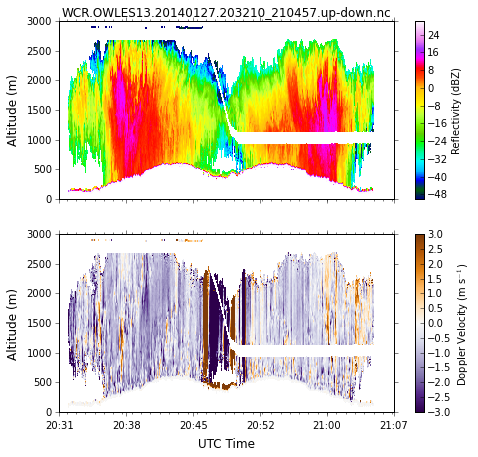

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7.5,7), sharex=True)


wcr_vp= RadarVerticalPlot(wcr)

wcr_vp.time_height_image('reflectivity', ax=ax1, plot_log10_var=False,
#              start_time=start_time, end_time=end_time,
                         vmin=refmin, vmax=refmax,
                         cb_label=r'Reflectivity (dBZ)',
                         other_min=altmin, other_max=altmax, title=file,
                         ylab=r'Altitude (m)', ylabFontSize=12)
              
wcr_vp.time_height_image('velocity', ax=ax2, plot_log10_var=False,
#              start_time=start_time, end_time=end_time,
                         vmin=velmin, vmax=velmax,
                         cmap="PuOr_r",
                         cb_label=r'Doppler Velocity (m s$^{-1}$)',
                         other_min=altmin, other_max=altmax,
                         ylab=r'Altitude (m)', ylabFontSize=12,
                         xlab='UTC Time', xlabFontSize=12)

<matplotlib.colorbar.Colorbar instance at 0x11d97f5f0>

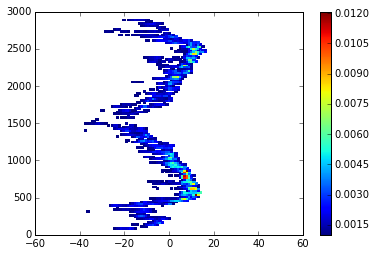

In [6]:
figC, axC = plt.subplots(1, 1)
binx, biny = np.linspace(-50, 50, 100, endpoint=True), np.linspace(0, 3000, 120, endpoint=True)
CFAD, xedges, yedges = np.histogram2d(wcr['fields']['reflectivity']['data'].ravel(), Ht2D.ravel(),
                                      bins=(binx, biny),normed=True)
#CFAD = axC.hist2d(wcr['fields']['reflectivity']['data'].ravel(), Ht2D.ravel(), normed=True,
#                 )#range=[[-40., 25.], [0., 3000.]], bins=[15, 10]
X, Y = np.meshgrid(xedges, yedges)
CFAD = np.ma.masked_where(CFAD < 0.00001, CFAD)
plt.pcolormesh(X, Y, CFAD.T * 100)
#axC.set_aspect('equal')
plt.colorbar()